In [18]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [44]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
df = pd.read_csv("../Web Scraping/predicting_house_price.csv")
df = df.drop("Unnamed: 0", axis =1)

# Review the DataFrame
df.head()

,lat,lon,city,style,price,number_of_beds,number_of_baths,extra_space,fire_place
0,43.333410,-79.882930,Waterdown,Townhouse,749900,2,3,0,0
1,43.856371,-79.337682,Markham,Detached,2998000,5,8,1,1
2,43.670890,-79.316931,Toronto,Detached,2599900,3,4,0,1
3,43.589623,-79.644388,Mississauga,Semi-Detached,2499850,4,4,1,0
4,43.447436,-79.666672,Oakville,Detached,1999000,5,4,0,1


In [45]:
print(df.corr())

                      lat       lon     price  number_of_beds  \
lat              1.000000  0.834972 -0.048344        0.007451   
lon              0.834972  1.000000 -0.023408       -0.058920   
price           -0.048344 -0.023408  1.000000        0.486948   
number_of_beds   0.007451 -0.058920  0.486948        1.000000   
number_of_baths -0.021757 -0.025729  0.611288        0.532419   
extra_space     -0.078297 -0.070226  0.235690       -0.039140   
fire_place       0.202641  0.192969  0.418459        0.262287   

                 number_of_baths  extra_space  fire_place  
lat                    -0.021757    -0.078297    0.202641  
lon                    -0.025729    -0.070226    0.192969  
price                   0.611288     0.235690    0.418459  
number_of_beds          0.532419    -0.039140    0.262287  
number_of_baths         1.000000     0.193510    0.369626  
extra_space             0.193510     1.000000    0.090484  
fire_place              0.369626     0.090484    1.000000  

<AxesSubplot:>

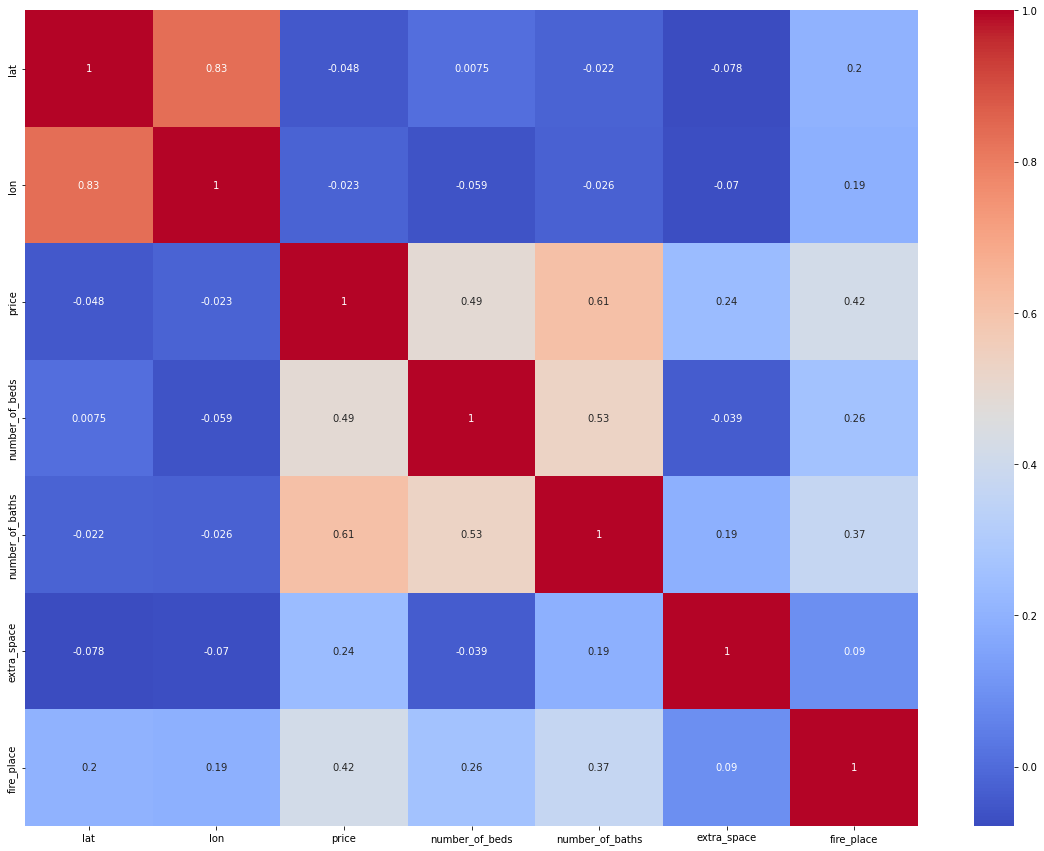

In [46]:
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)

In [36]:
df_encoded = pd.get_dummies(df, columns=['city', 'style'])
df = df_encoded.drop(columns=["postal_code", "fire_place", "street", "lat", "lon"])

df.head()

,price,number_of_beds,number_of_baths,extra_space,city_Ajax,city_Alban,city_Alexandria,city_Alnwick/Haldimand,city_Amherstburg,city_Ancaster,...,city_Waterloo,city_Welland,city_Whitby,city_Whitchurch-Stouffville,city_Windsor,city_Woodstock,style_Detached,style_Semi-Detached,style_Townhouse,province_Ontario
0,2998000,5,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2599900,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1999000,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1425000,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1199000,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [37]:
X = df.copy()
X.drop("price", axis=1, inplace=True)
y = df["price"]
X.head()

,number_of_beds,number_of_baths,extra_space,city_Ajax,city_Alban,city_Alexandria,city_Alnwick/Haldimand,city_Amherstburg,city_Ancaster,city_Arnprior,...,city_Waterloo,city_Welland,city_Whitby,city_Whitchurch-Stouffville,city_Windsor,city_Woodstock,style_Detached,style_Semi-Detached,style_Townhouse,province_Ontario
0,5,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

model = tree.DecisionTreeClassifier()

model = model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.00558659217877095